In [10]:
from canvas import *
from generators2 import *
import matplotlib.pyplot as plt
import numpy as np
import os

In [19]:
def sample_8(trajectory): # samples 8 points evenly spaced along trajectory (with interpolation)
    res = []
    n = len(trajectory) - 1
    trajectory = trajectory / np.array([128, 128, -30]) + np.array([-1, -1, 0])
    
    distances = [0]
    total_distance = 0
    for i in range(n-1):
        p0 = trajectory[i]
        p1 = trajectory[i+1]
        total_distance += np.linalg.norm(p0 - p1)
        distances.append(total_distance)
    
    def sample_at(t):
        assert 0 <= t and t <= 1
        for i in range(n-1):
            d0 = distances[i] / total_distance
            d1 = distances[i+1] / total_distance
            if d1 >= t:
                k = (t-d0) / (d1-d0)
                return trajectory[i]*(1-k) + trajectory[i+1]*k
    
    res = [sample_at(t/7) for t in range(8)]
    return res
        

0.0 0.0006000839034178727 0.0
0.14280464304347926 0.14340459968642086 0.08750601277816433
0.2855804658507008 0.2861803076205571 0.22309193909081743
0.42816998959506625 0.42864075853881883 0.8527303716391234
0.5712422285600636 0.5717107408345115 0.3977331623326657
0.714029628569804 0.7144538422153556 0.6036715664281129
0.8567588498805037 0.8571843112008329 0.9025667998591271
0.9995727446749896 1.0 1.0


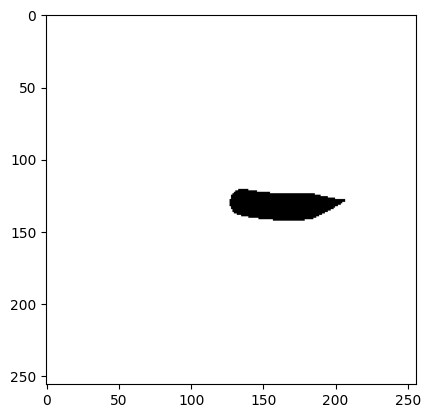

In [20]:
gen = CubicBezierGenerator()
stroke, trajectory = gen.gen()
plt.imshow(stroke)
trajectory = sample_8(trajectory)

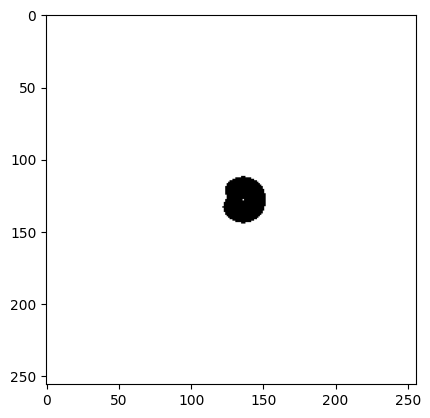

In [13]:
gen = CircleGenerator()
stroke, trajectory = gen.gen()
plt.imshow(stroke)
trajectory = sample_8(trajectory)

In [14]:
gens = [CubicBezierGenerator(), CircleGenerator()]
strokes = []
trajectories = []
for gen in gens:
    for i in range(200):
        s, t = gen.gen()
        strokes.append(s[:,:,0]/255)
        trajectories.append(sample_8(t))
strokes = np.stack(strokes)
trajectories = np.stack(trajectories)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.83521835e-03 -1.93582535e-02  1.33424014e-01]
 [ 7.22447633e-03 -3.74544951e-02  2.66928455e-01]
 [ 7.29406223e-02 -7.24833345e-02  3.26104992e-01]
 [ 1.00206190e-01  4.62530266e-02  3.26104992e-01]
 [ 1.66077801e-02  5.41776715e-02  2.87641362e-01]
 [ 5.02136390e-03  3.15531825e-02  1.55243175e-01]
 [ 1.13669692e-04  4.85537047e-03  2.31840268e-02]]


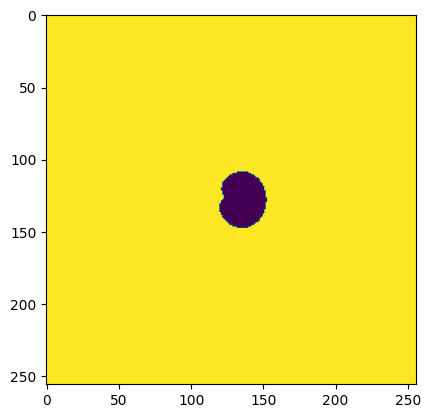

In [15]:
idx = 243
plt.imshow(strokes[idx])
print(trajectories[idx])

In [16]:
os.makedirs("stroke_data", exist_ok=True)
with open("stroke_data/strokes.npy", "wb") as f:
    np.save(f, strokes)
with open("stroke_data/trajectories.npy", "wb") as f:
    np.save(f, trajectories)